PART4(MODEL_COMPARISON)

In this final chapter of our project on Acetylcholinesterase we would be comparing different machine learning models to see which gives the best result.

A brief summary of what we have done so far in previous chapters. In the first chapter, we performed data collection from the chembl database, extracted the bioactivity data for human Acetylcholinesterase, we cleaned the data and categorized or labelled the compounds as <b> active, inactive or intermediate</b>.

In the second part we performed exploratory data analysis, calculated the <b>Lipinski</b> descriptors, converted the <b>IC50</b> to <b>pIC50</b>, we normalized the standard value and perfomred statistical analysis using the <b>Mann-Whitney U test</b>.

In the third section, we calculated the molecular descriptors of the compounds, calculated the <b>pubchem fingerprints</b> and prepared our data for model building.

### Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from chembl_webresource_client.new_client import new_client
from sklearn.model_selection import train_test_split

### Load the data

In [2]:
df = pd.read_csv('acetylcholinesterase_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.735182
4409,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.872895
4410,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.716699
4411,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.377786


In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4409,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4410,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4411,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['pIC50']
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4408    6.735182
4409    7.872895
4410    7.716699
4411    8.377786
4412    8.000000
Name: pIC50, Length: 4413, dtype: float64

### DATA PRE-PROCESSING

In [5]:
X.shape

(4413, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8*(1 - 0.8)))
X = selection.fit_transform(X)
X.shape

(4413, 143)

### Split the data into training and testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### COMPARE MACHINE LEARNING MODELS

In [8]:
#Define and build the model classifier

import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models_train, predictions_train = clf.fit(X_train, X_test, y_train, y_test)

models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [34:31<00:00, 49.33s/it]   


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [33:42<00:00, 48.16s/it]   


So we notice that we have 42 models(ML algorithm) we are comparing on our dataset. This means the model building would take some time to complete.

In [9]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.67,0.72,0.98,5.20
HistGradientBoostingRegressor,0.65,0.70,1.01,3.26
XGBRegressor,0.65,0.70,1.01,1.07
LGBMRegressor,0.61,0.67,1.06,0.39
BaggingRegressor,0.61,0.67,1.06,0.89
KNeighborsRegressor,0.60,0.67,1.07,0.15
MLPRegressor,0.59,0.66,1.08,6.64
SVR,0.55,0.62,1.14,2.23
NuSVR,0.53,0.61,1.16,1.95


In [10]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.67,0.72,0.98,5.20
HistGradientBoostingRegressor,0.65,0.70,1.01,3.26
XGBRegressor,0.65,0.70,1.01,1.07
LGBMRegressor,0.61,0.67,1.06,0.39
BaggingRegressor,0.61,0.67,1.06,0.89
KNeighborsRegressor,0.60,0.67,1.07,0.15
MLPRegressor,0.59,0.66,1.08,6.64
SVR,0.55,0.62,1.14,2.23
NuSVR,0.53,0.61,1.16,1.95


In [11]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.67,0.72,0.98,5.83
HistGradientBoostingRegressor,0.65,0.70,1.01,2.97
XGBRegressor,0.65,0.70,1.01,1.13
LGBMRegressor,0.61,0.67,1.06,0.38
BaggingRegressor,0.61,0.67,1.06,0.63
KNeighborsRegressor,0.60,0.67,1.07,0.13
MLPRegressor,0.59,0.66,1.08,5.28
SVR,0.55,0.62,1.14,2.58
NuSVR,0.53,0.61,1.16,1.72


In [12]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.67,0.72,0.98,5.83
HistGradientBoostingRegressor,0.65,0.70,1.01,2.97
XGBRegressor,0.65,0.70,1.01,1.13
LGBMRegressor,0.61,0.67,1.06,0.38
BaggingRegressor,0.61,0.67,1.06,0.63
KNeighborsRegressor,0.60,0.67,1.07,0.13
MLPRegressor,0.59,0.66,1.08,5.28
SVR,0.55,0.62,1.14,2.58
NuSVR,0.53,0.61,1.16,1.72


### DATA VISUALIZATION OF MODEL PERFORMANCE

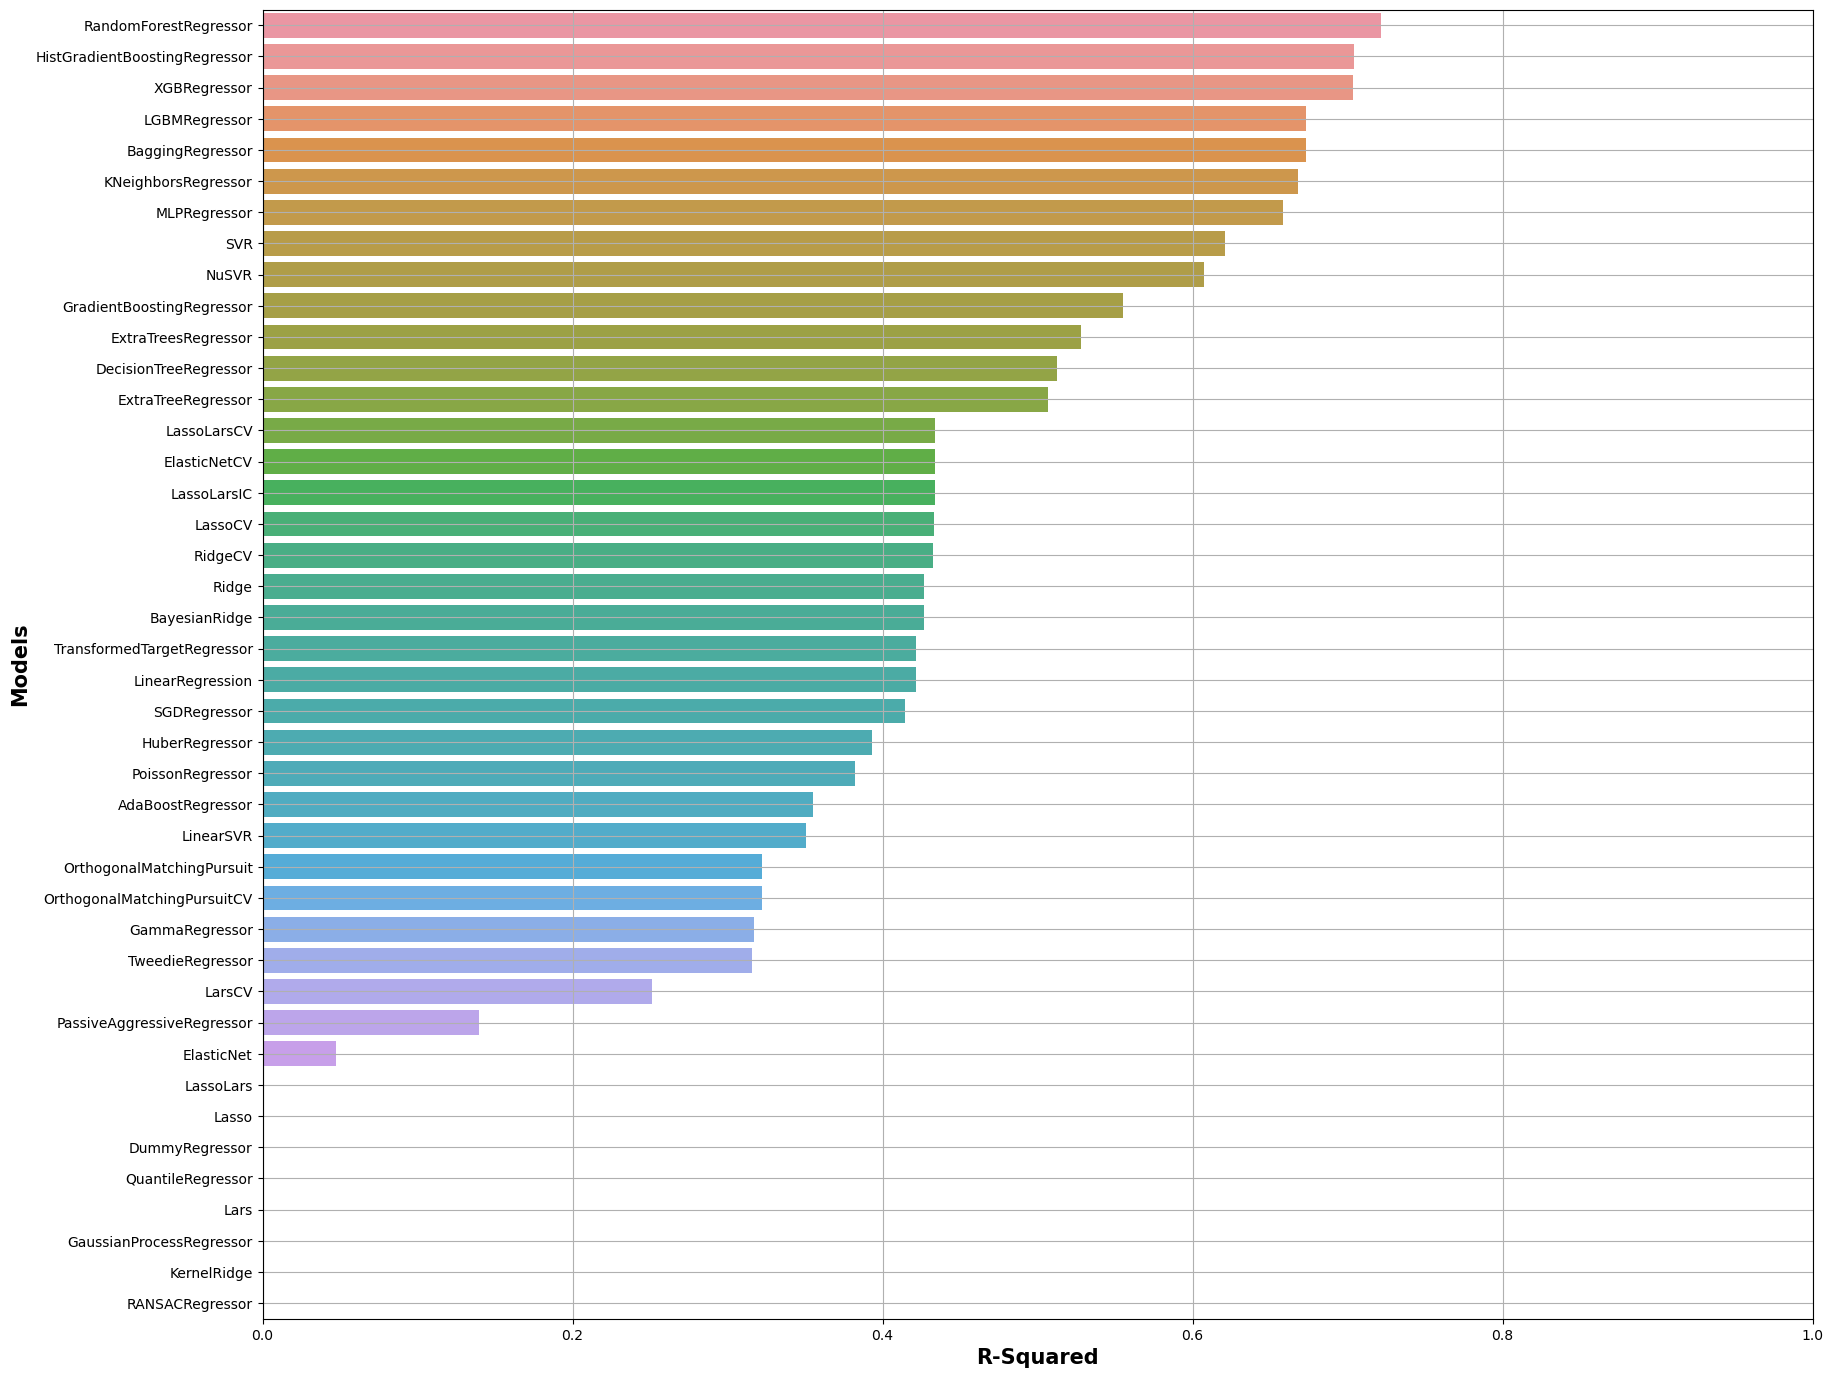

In [13]:
# Visualizing the R-Squared perfomance of the models

import seaborn as sns
plt.figure(figsize=(20,17))

ax = sns.barplot(x='R-Squared', y=predictions_train.index, data=predictions_train)
ax.set(xlim=(0, 1))
plt.xlabel('R-Squared', fontsize=15, fontweight='bold')
plt.ylabel('Models', fontsize=15, fontweight='bold')
plt.grid(True)
plt.show()   

### Visualizing the RMSE of the different models 

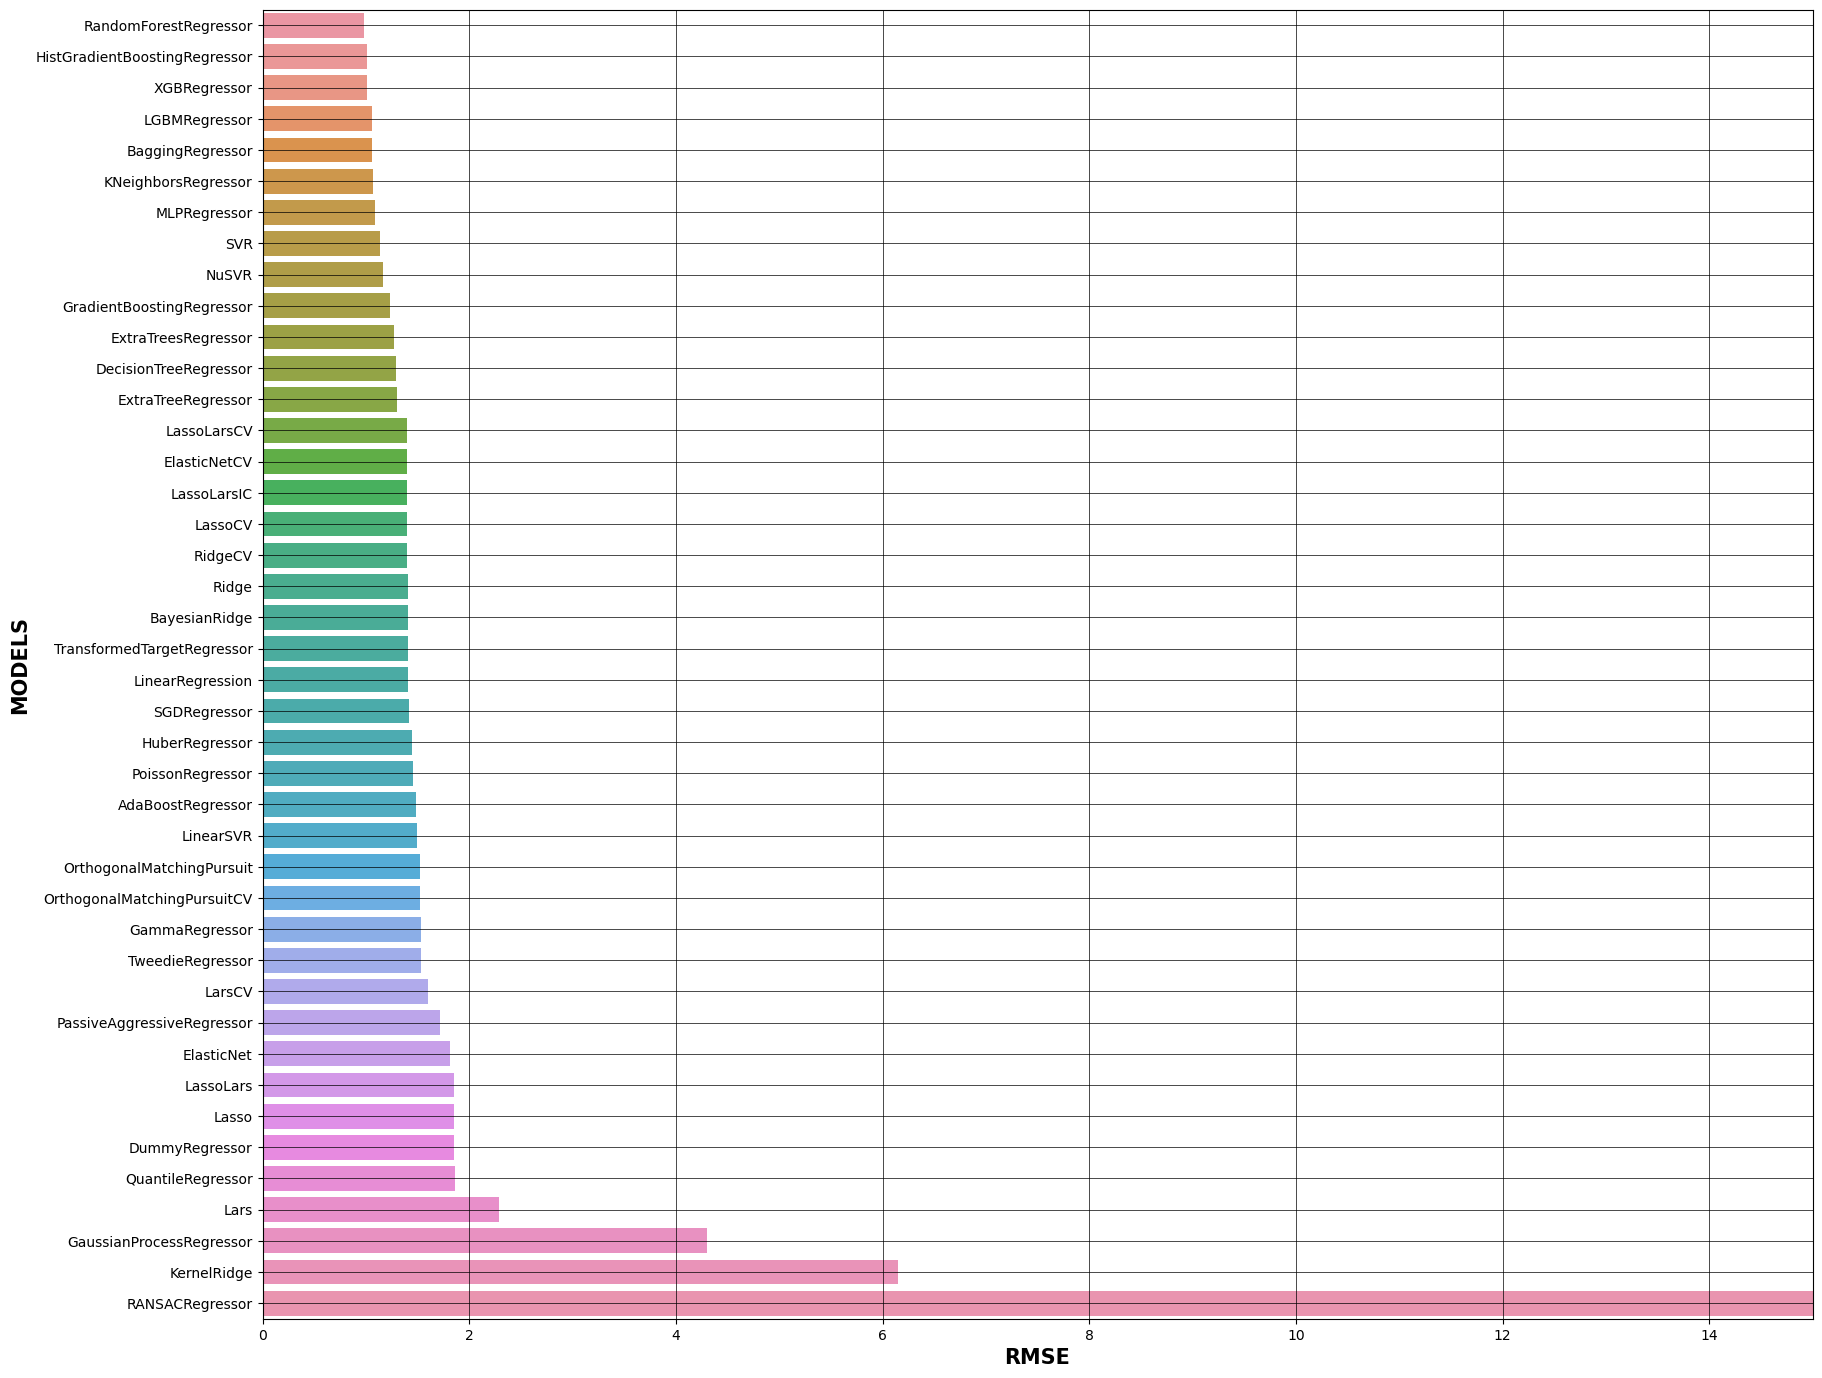

In [14]:
plt.figure(figsize=(20, 17))

ax = sns.barplot(x='RMSE', y=predictions_train.index, data=predictions_train)

ax.set(xlim=(0, 15))

plt.xlabel('RMSE', fontsize=15, fontweight='bold')
plt.ylabel('MODELS', fontsize=15, fontweight='bold')
plt.grid(which='major', color='k', linewidth=0.5)
plt.show()